# Sprint3 線形回帰スクラッチ

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set()
%matplotlib inline

In [414]:
#House Plice のデータ
train_data = pd.read_csv('train.csv')
#display(train_data.head(3))
X_df = train_data.loc[:,['GrLivArea','YearBuilt']]
y_df = train_data.loc[:,'SalePrice']
#display(X_df)
X = X_df.loc[:,['GrLivArea']].values
y = y_df.values

In [429]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

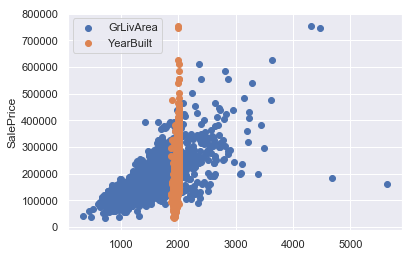

In [387]:
plt.scatter(X_df['GrLivArea'],y_df,label="GrLivArea")
plt.scatter(X_df['YearBuilt'],y_df,label="YearBuilt")

plt.ylabel("SalePrice")
plt.legend()

In [430]:
def MSE(y_pred, y):
    error_mse = y_pred - y   
    mse = np.sum(error_mse **2) /len(y)
    return mse #問題４


class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """
    def __init__(self, num_iter=10000, lr=0.000000001, bias=True, verbose=True): #自動で走る部分
        # ハイパーパラメータを属性として記録　　　　　　　　　　　　　　#初期値をここに入れる
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.theta = None
    
    # 関数はなるべくシンプルで計算メインの方が応用がきく
    def _linear_hypothesis(self, X): #問題１ 
#         print(self.theta.shape)
        return np.dot(self.theta, X.T).reshape(len(X),1) #問題１
 
    def _gradient_descent(self, X, error): 
#         print(self.theta.shape)
        self.theta = self.theta - self.lr * ((np.dot(error, X))
                                             /X.shape[0])#問題２
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        検証用データが入力された場合はそれに対する
        損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        x_array = np.insert(X,0,1,axis=1) #一行目に１のみのx0を追加
        self.theta = np.random.rand(1,x_array.shape[1]) #theta 初期値      
#         print(error.reshape(error.shape[1],1).shape) #(data, 1)に変更        
        for i in range(self.iter):    
            #θの値を更新。損失関数が０になったら打ち切り。最大回数はnum_iter。
            error = self._linear_hypothesis(x_array).T - y #問題２ 
            self._gradient_descent(x_array, error)
            y_pred = self._linear_hypothesis(x_array)      
            mse = MSE(y_pred, y)
            self.loss[i] =mse #問題５
            
            if y_val is not None:
                y_pred = self._linear_hypothesis(np.insert(X_val,0,1,axis=1))
                mse_val = MSE(y_pred, y_val)
                self.val_loss[i] = mse_val #問題５　#X_val=None, y_val=None
        
        if self.verbose== True:
            #verboseをTrueにした際は学習過程を出力
            print(self.loss)
            if y_val is not None:
                print(self.val_loss)
 
    def predict(self, X):
        """
        線形回帰を使い推定する。
        """
        x_array = np.insert(X,0,1,axis=1)
        y_pred = np.dot(self.theta, x_array.T).reshape(X.shape[0])
        
        return y_pred

In [431]:
#問題６
slr = ScratchLinearRegression()
slr.fit(X_train,y_train,X_val=X_test, y_val=y_test)

[4.21354118e+13 4.19584471e+13 4.17824235e+13 ... 1.08711777e+13
 1.08711777e+13 1.08711777e+13]
[1.40719902e+13 1.40116603e+13 1.39516601e+13 ... 4.10696504e+12
 4.10696504e+12 4.10696504e+12]


In [432]:
slr.predict(X_train)

array([156772.1151687 , 133675.27253078, 124460.47002756, ...,
       218283.91369664, 343700.96594817, 103398.06430593])

In [437]:
#scikit-learn と比較
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [433]:
slr.theta

array([[  0.79985429, 119.67275978]])

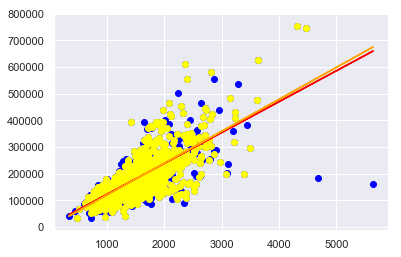

In [438]:
plt.scatter(X, y, color = 'blue')    # 説明変数と目的変数のデータ点の散布図をプロット
plt.scatter(X_train, y_train, color = 'yellow')
plt.plot(X, lr.predict(X), color = 'red') # 回帰直線をプロット
plt.plot(X, slr.predict(X), color = 'orange')
plt.grid(True)                                 # グリッド線を表示
plt.show()                                 # 図の表示

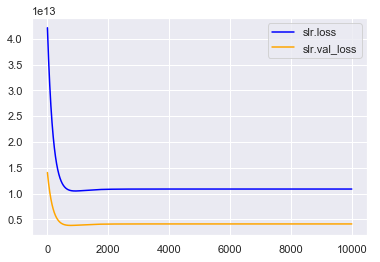

In [439]:
#問題７
plt.plot(slr.loss,label='slr.loss', color = 'blue')
plt.plot(slr.val_loss,label='slr.val_loss', color = 'orange')
plt.grid(True)                                 # グリッド線を表示
plt.legend()

## 【問題1】仮定関数
>線形回帰の仮定関数を実装してください。メソッドの雛形を用意してあります。

In [17]:
def _linear_hypothesis(self, X):
    """
    線形の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ

    Returns
    -------
      次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果

    """   
    #パラメータθはxと同数のランダム行列。nは特徴量
    #x行列はx０＝１を追加して、X.shape=(n_samples, n_features)。
    #-> np.random.randで一様分布からサンプリングした乱数（ [0,1]の範囲）
    #θ　・xt　の行列の内積→求める仮定関数。
    
    theta = np.random.rand(X.shape[1]+1)
    x_array = np.insert(X,0,1,axis=1)
    
    return np.dot(theta, x_array.T).reshape(len(X),1)

## 【問題2】最急降下法
>最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。

In [19]:
    error = _linear_hypothesis(self, X).T - y #問題２        

        def _gradient_descent(self, X, error): 
            theta = theta - lr * (np.dot(error, X))/X.shape[0]
            pass
            #アダマール積からの和、もしくは行列積shape(1,2)になったらok
            #問題２
        
        if self.verbose== True:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass

## 【問題3】推定
>推定する仕組みを実装してください。ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。
仮定関数 hθ(x)の出力が推定結果です。

In [ ]:
def predict(self, X):
    #線形回帰を使い推定する。
    #X : 次の形のndarray, shape (n_samples, n_features)
    #サンプル
    
    
    
    
    return #次の形のndarray, shape (n_samples, 1), 
           #線形回帰による_linear_hypothesis(self, X)->仮定関数 hθ(x)の出力が推定結果
    
    
    


## 【問題4】平均二乗誤差
>線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。
平均二乗誤差関数は回帰問題全般で使える関数のため、ScratchLinearRegressionクラスのメソッドではなく、別の関数として作成してください。雛形を用意してあります。

In [382]:
def MSE(y_pred, y):
    error_mse = y_pred - y   
    mse = np.sum(error_mse **2) /len(y)
    return mse #問題４

## 【問題5】目的関数
>線形回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。

## 【問題6】学習と推定
>機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。
scikit-learnによる実装と比べ、正しく動いているかを確認してください。

In [ ]:
# scikit-learnによる実装

#結果比較

## 【問題7】学習曲線のプロット
>学習曲線を表示する関数を作成し、実行してください。グラフを見て損失が適切に下がっているかどうか確認してください。
線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

In [32]:
#雛形メモ
# class ScratchLinearRegression():
#     """
#     線形回帰のスクラッチ実装

#     Parameters
#     ----------
#     num_iter : int
#       イテレーション数
#     lr : float
#       学習率
#     no_bias : bool
#       バイアス項を入れない場合はTrue
#     verbose : bool
#       学習過程を出力する場合はTrue

#     Attributes
#     ----------
#     self.coef_ : 次の形のndarray, shape (n_features,)
#       パラメータ
#     self.loss : 次の形のndarray, shape (self.iter,)
#       学習用データに対する損失の記録
#     self.val_loss : 次の形のndarray, shape (self.iter,)
#       検証用データに対する損失の記録

#     """

#     def __init__(self, num_iter, lr, bias, verbose):
#         # ハイパーパラメータを属性として記録
#         self.iter = num_iter
#         self.lr = lr
#         self.bias = bias
#         self.verbose = verbose
#         # 損失を記録する配列を用意
#         self.loss = np.zeros(self.iter)
#         self.val_loss = np.zeros(self.iter)
        
#     def _linear_hypothesis(self, X): #問題１
#         theta = np.random.rand(X.shape[1]+1)
#         x_array = np.insert(X,0,1,axis=1)
#         return np.dot(theta, x_array.T).reshape(len(X),1) #問題１
    
#     def fit(self, X, y, X_val=None, y_val=None):
#         """
#         線形回帰を学習する。
#         検証用データが入力された場合はそれに対する
#         損失と精度もイテレーションごとに計算する。

#         Parameters
#         ----------
#         X : 次の形のndarray, shape (n_samples, n_features)
#             学習用データの特徴量
#         y : 次の形のndarray, shape (n_samples, )
#             学習用データの正解値
#         X_val : 次の形のndarray, shape (n_samples, n_features)
#             検証用データの特徴量
#         y_val : 次の形のndarray, shape (n_samples, )
#             検証用データの正解値
#         """
#         error = _linear_hypothesis(self, X).T - y #問題２        

#         def _gradient_descent(self, X, error): 
#             theta = theta - lr * (np.dot(error, X))/X.shape[0]
#             #アダマール積からの和、もしくは行列積shape(1,2)になったらok
#             #問題２
        
#         if 
#         for :
#             #θの値を更新。損失関数が０になったら打ち切り。最大回数はnum_iter。
    
        
        
#         if self.verbose== True:
#             #verboseをTrueにした際は学習過程を出力
#             print()


#     def predict(self, X):
#         """
#         線形回帰を使い推定する。

#         Parameters
#         ----------
#         X : 次の形のndarray, shape (n_samples, n_features)
#             サンプル

#         Returns
#         -------
#             次の形のndarray, shape (n_samples, 1)
#             線形回帰による推定結果
#         """

#         fit(X)
#         return #_linear_hypothesis(self, X)

## 【問題8】（アドバンス課題）バイアス項の除去
>バイアス項 
θ
0
 を抜くと学習がどう変化するか検証してください。また、線形回帰モデルにおけるバイアス項の役割の考察・調査を行ってください。

## 【問題9】（アドバンス課題）特徴量の多次元化
>特徴量の二乗や三乗を入力に利用すると学習結果がどう変化するか検証してください。

## 【問題10】（アドバンス課題）更新式の導出
>最急降下法の更新式が導出される過程を説明してください。

In [ ]:
theta = theta - MSE(#偏微分)


In [18]:
# def calc_gradient(f, X):
#     """
#     calc_gradient
#     偏微分を行う関数
#     関数fを変数xの各要素で偏微分した結果をベクトルにした勾配を返す
    
#     @params
#     f: 対象となる関数
#     X: 関数fの引数のベクトル(numpy.array)
    
#     @return
#     gradient: 勾配(numpy.array)
#     """
    
#     h = 1e-4
#     gradient = np.zeros_like(X)
    
#     # 各変数についての偏微分を計算する
#     for i in range(X.size):
#         store_X = X[:]
        
#         # f(x+h)
#         X[i] += h
#         f_x_plus_h = f(X)

#         X = store_X[:]
        
#         # f(x-h)
#         X[i] -= h
#         f_x_minus_h = f(X)
        
#         # 偏微分
#         gradient[i] = (f_x_plus_h - f_x_minus_h) / (2 * h)
        
#     return gradient

In [ ]:
# def gradient_descent(f, X, learning_rate, max_iter):
#     """
#     gradient_descent
#     最急降下法を行う関数
    
#     @params
#     f: 対象となる関数
#     X: 関数fの引数のベクトル(numpy.array)
#     learning_rate: 学習率
#     max_iter: 繰り返し回数
    
#     @return
#     X: 関数の出力を最小にする(であろう)引数(numpy.array)
#     """
    
#     for i in range(max_iter):
#         X -= (learning_rate * calc_gradient(f, X))
#         print("[{:3d}] X = {}, f(X) = {:.7f}".format(i, X, f(X)))
        
#     return X

## 【問題11】（アドバンス課題）局所最適解の問題
>最急降下法には一般的に局所最適解の問題があります。しかし、線形回帰では学習を続ければ必ず最適解を求めることができます。それはなぜか数式やグラフを用いて説明してください。